In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import matplotlib as mpl
import numpy as np

In [4]:
with open("starwars-episode-3-interactions-allCharacters.json", "r") as data_json:
    data = json.load(data_json)

In [5]:
graph = nx.Graph()

In [6]:
for index, node in enumerate(data["nodes"]):
    graph.add_node(index, name = node["name"], value = node["value"], color = node["colour"])

In [7]:
for link in data["links"]:
    graph.add_edge(link["source"], link["target"], value=link["value"])

In [ ]:
node_names = nx.get_node_attributes(graph, 'name')
node_values = nx.get_node_attributes(graph, 'value')
node_colors = list(nx.get_node_attributes(graph, 'color').values())
node_sizes = [graph.nodes[node]['value'] for node in graph.nodes]
edge_values = nx.get_edge_attributes(graph, 'value')
edge_widths = [graph.edges[edge]['value'] for edge in graph.edges]
print(node_sizes)

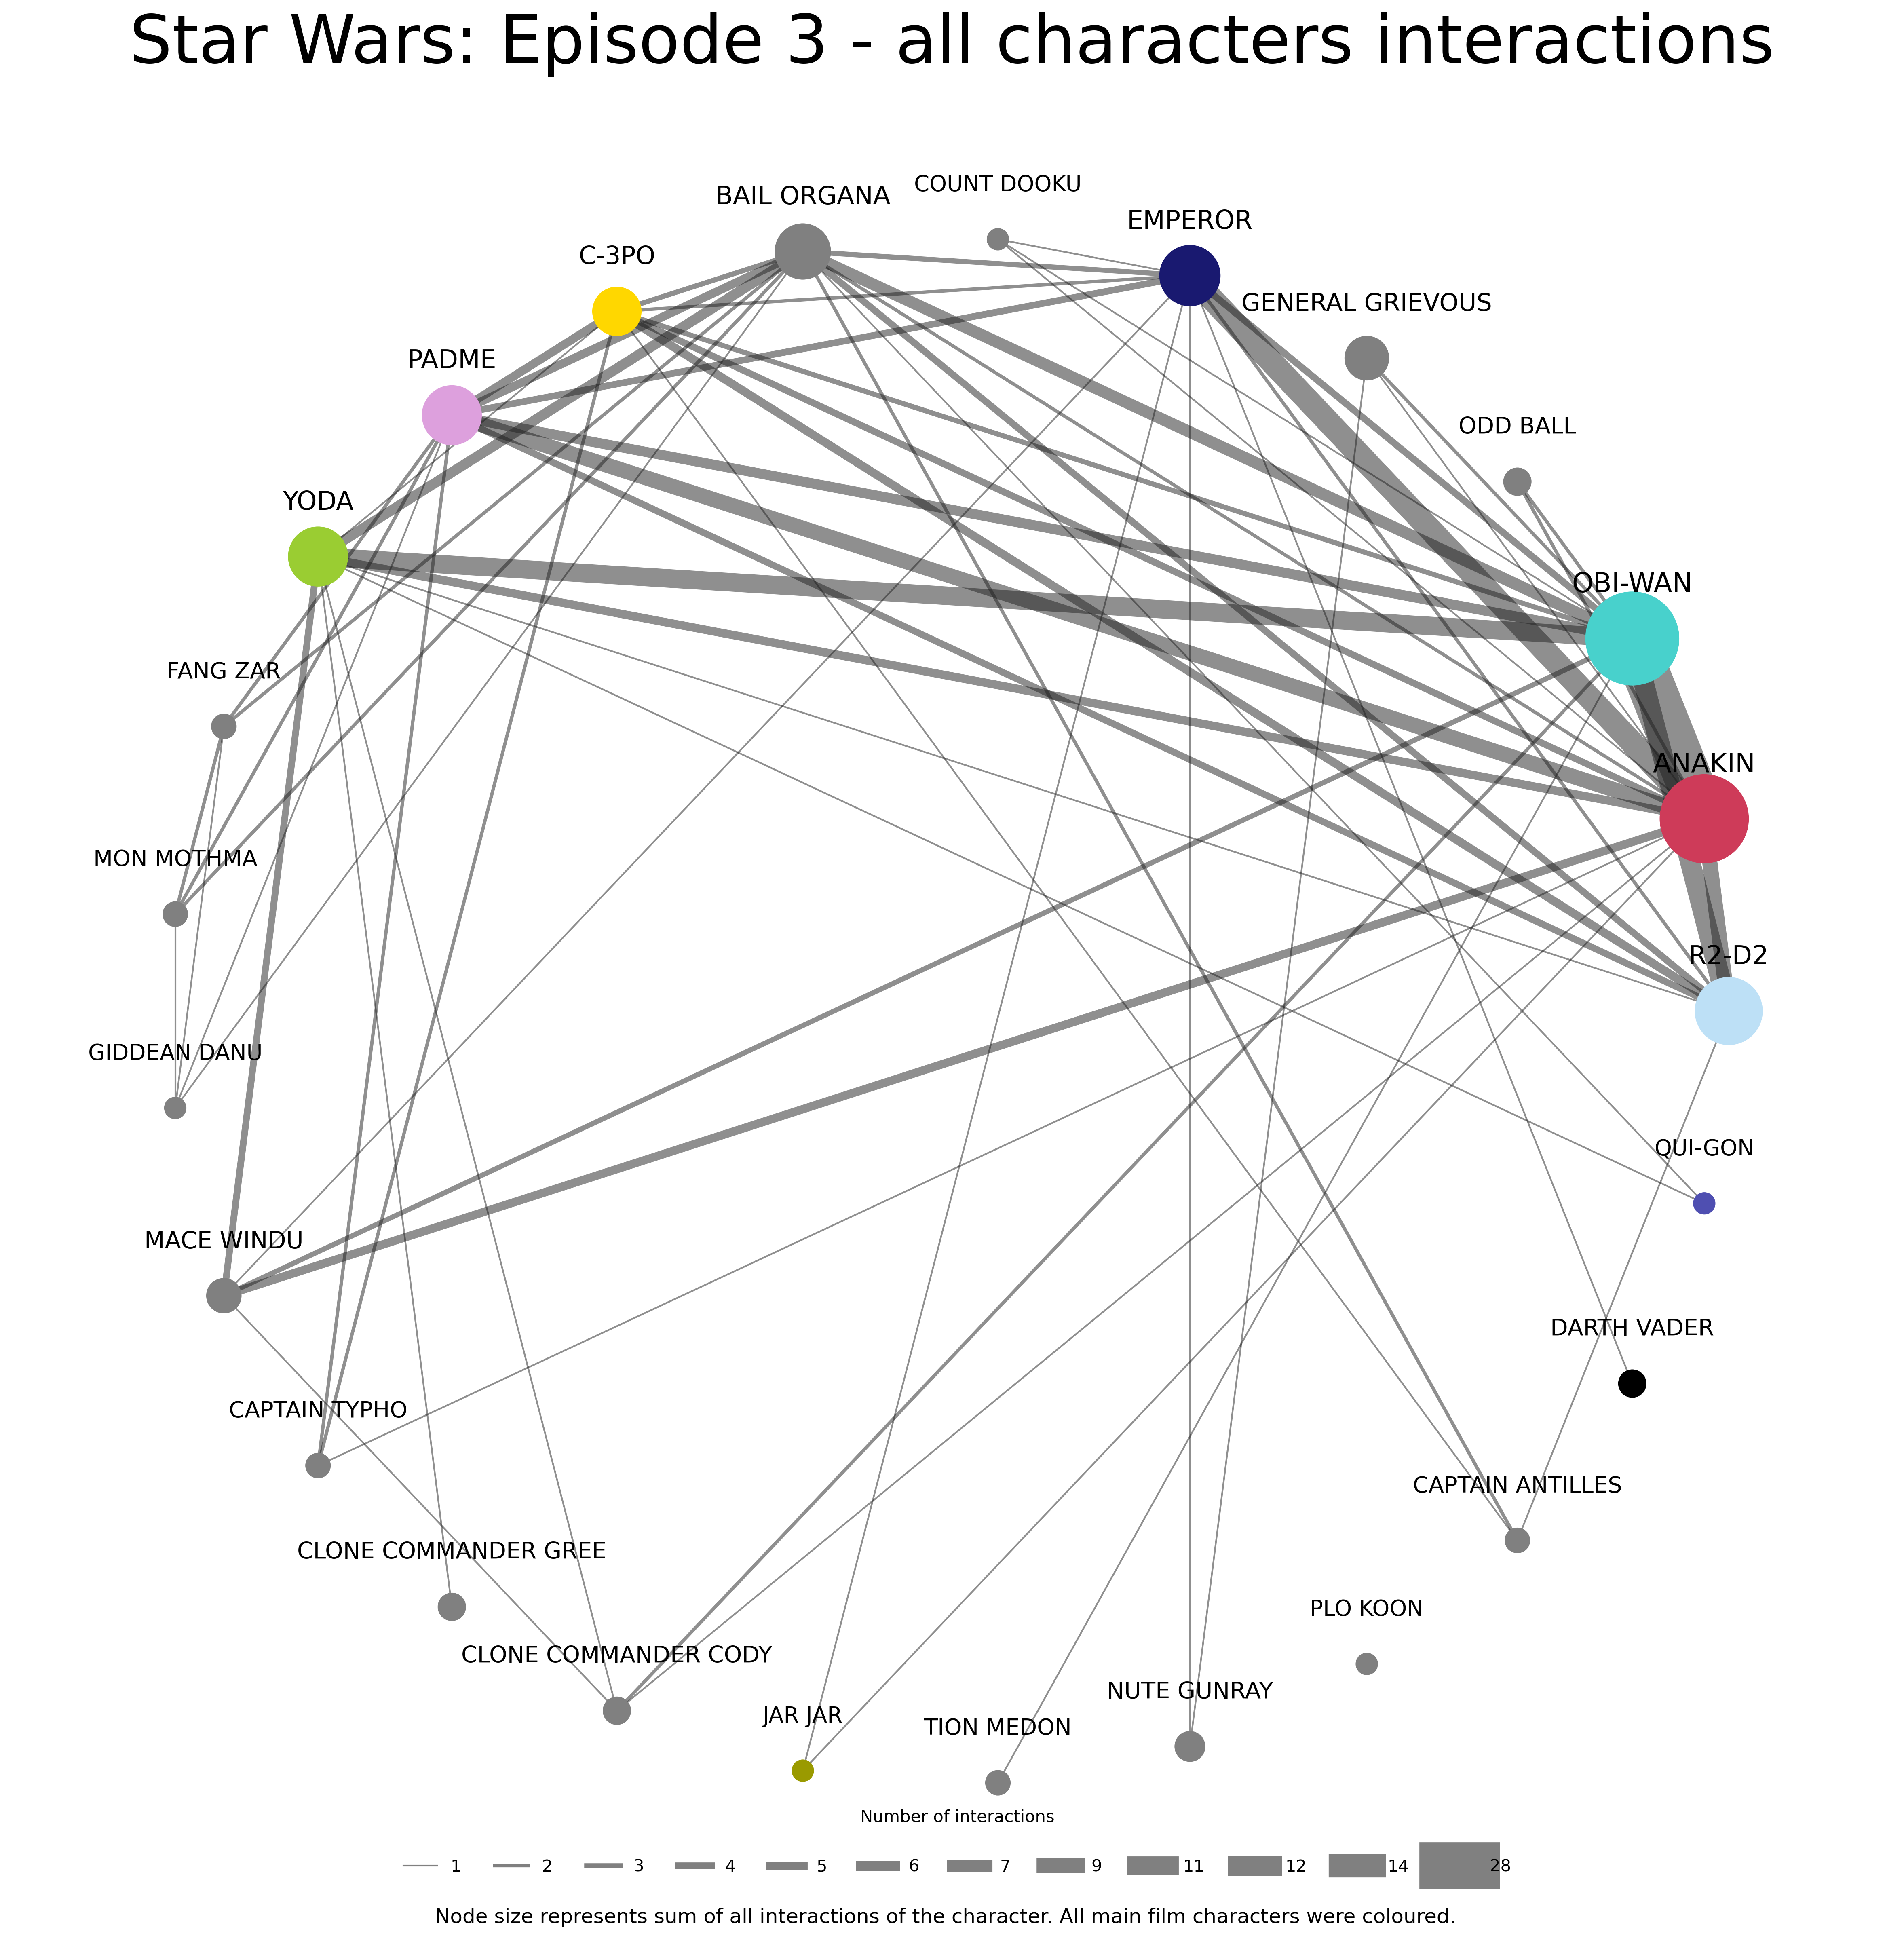

In [42]:
pos = nx.circular_layout(graph)

max_weight = max(edge_values.values())

fig, ax = plt.subplots(1, 1, figsize = (20, 20), dpi = 300)

ax.set_title("Star Wars: Episode 3 - all characters interactions", fontsize = 40)

nx.draw_networkx_nodes(
    graph,
    pos = pos, 
    node_color = node_colors, 
    node_size = np.array(node_sizes) * 50, 
    ax = ax)

nx.draw_networkx_edges(
    graph, 
    pos = pos, 
    width = edge_widths, 
    edge_color = "#202020", 
    alpha = 0.5, 
    ax = ax)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y + 0.07, node_names[i], fontsize = 12 + np.log(node_values[i]), ha = "center", va = "center")

# chciałem dodać drugą legendę, ale coś mi nie działa

# for v in [3,4,5,6,8,13,16,21,24,25,31,54,60]:
#     ax.plot([], [], "o", markersize = v * 2, label = v)

# first_legend = ax.legend( 
#     labelspacing = 2, 
#     title = "Sum of interactions", 
#     frameon = False, 
#     ncol = 12, 
#     loc = "center right", 
#     bbox_to_anchor = (1, 0.01)
# )
# ax.add_artist(first_legend)

ax.legend(
    handles=[mpl.lines.Line2D([], [], color="grey", linewidth = e) for e in np.unique(edge_widths)],
    labels = list(np.unique(edge_widths)),
    loc = "center left", 
    bbox_to_anchor=(0.20, 0.055),
    frameon = False,
    title = "Number of interactions",
    labelspacing = 2,
    ncol = 12
)

ax.text(0.225, 0.02, 
"""Node size represents sum of all interactions of the character. All main film characters were coloured.""", 
    fontsize = 12, 
    transform = ax.transAxes,
    verticalalignment="top" )


plt.axis("off")
plt.savefig('output.png', format='png', dpi=300)
plt.show()